In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
df = pd.read_csv('framingham.csv')
print(df.columns)
print(df.dtypes)


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [51]:
df.isnull().sum()
df.fillna(df.median(),inplace=True)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

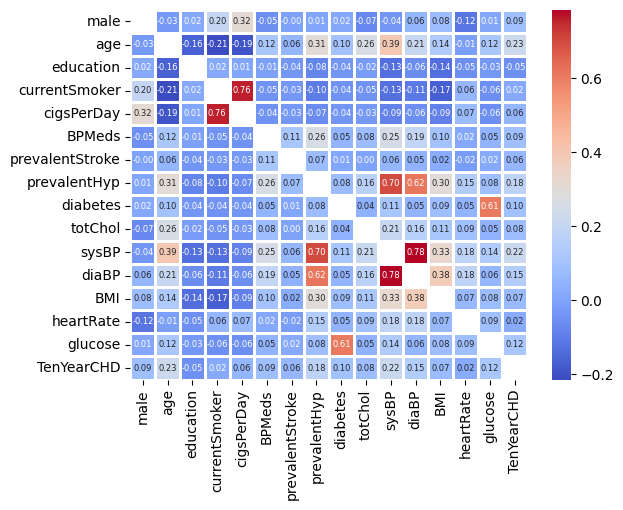

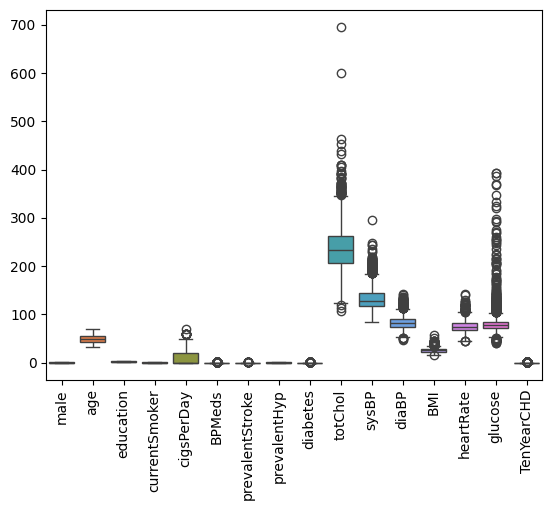

In [52]:
core = df.corr()
mask = np.eye(core.shape[0], dtype=bool)
sns.heatmap(core,annot=True,cmap='coolwarm',fmt=".2f", annot_kws={"size": 6},linewidths=1.0,mask=mask)

plt.show()
sns.boxplot(data=df)
plt.xticks(rotation=90) 
plt.show()

In [53]:
from scipy.stats import zscore

z_scores = df.apply(zscore) 
outliers = (z_scores.abs() > 3)  
print(outliers.sum())  


male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          21
BPMeds             124
prevalentStroke     25
prevalentHyp         0
diabetes           109
totChol             25
sysBP               48
diaBP               41
BMI                 60
heartRate           23
glucose             50
TenYearCHD           0
dtype: int64


In [54]:
print(df.skew())


male                0.286135
age                 0.228146
education           0.697171
currentSmoker       0.023606
cigsPerDay          1.257472
BPMeds              5.588351
prevalentStroke    12.909062
prevalentHyp        0.819278
diabetes            5.994378
totChol             0.878718
sysBP               1.145362
diaBP               0.714102
BMI                 0.985442
heartRate           0.644608
glucose             6.541476
TenYearCHD          1.939741
dtype: float64


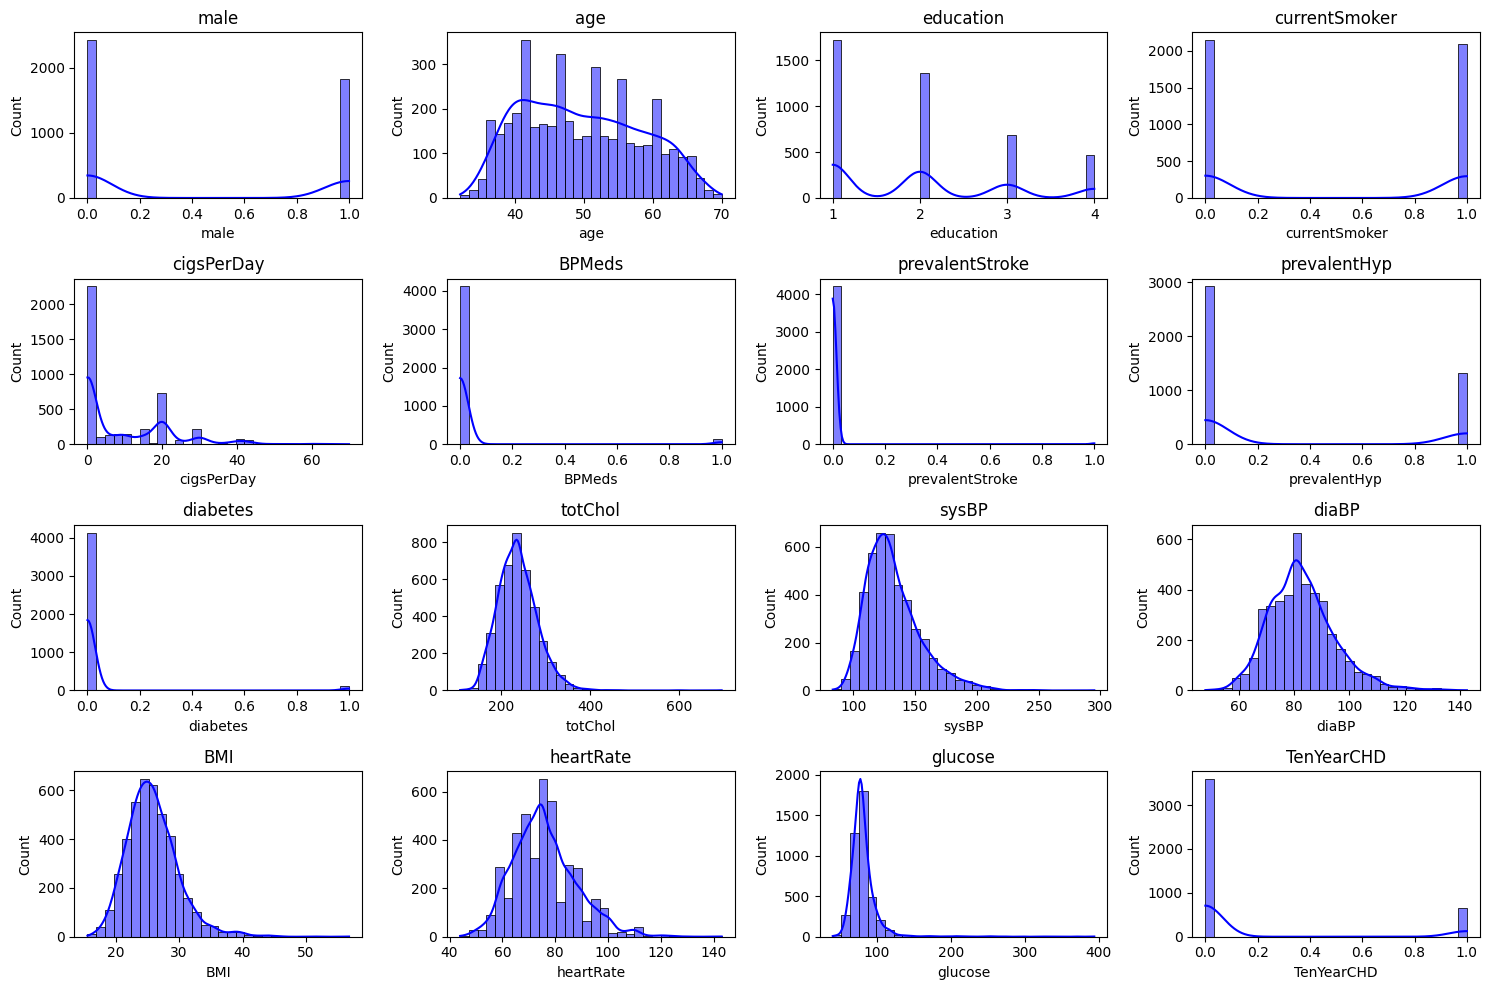

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(df[column], kde=True, bins=30, color="blue", edgecolor="black")  
    plt.title(column)

plt.tight_layout() 
plt.show()


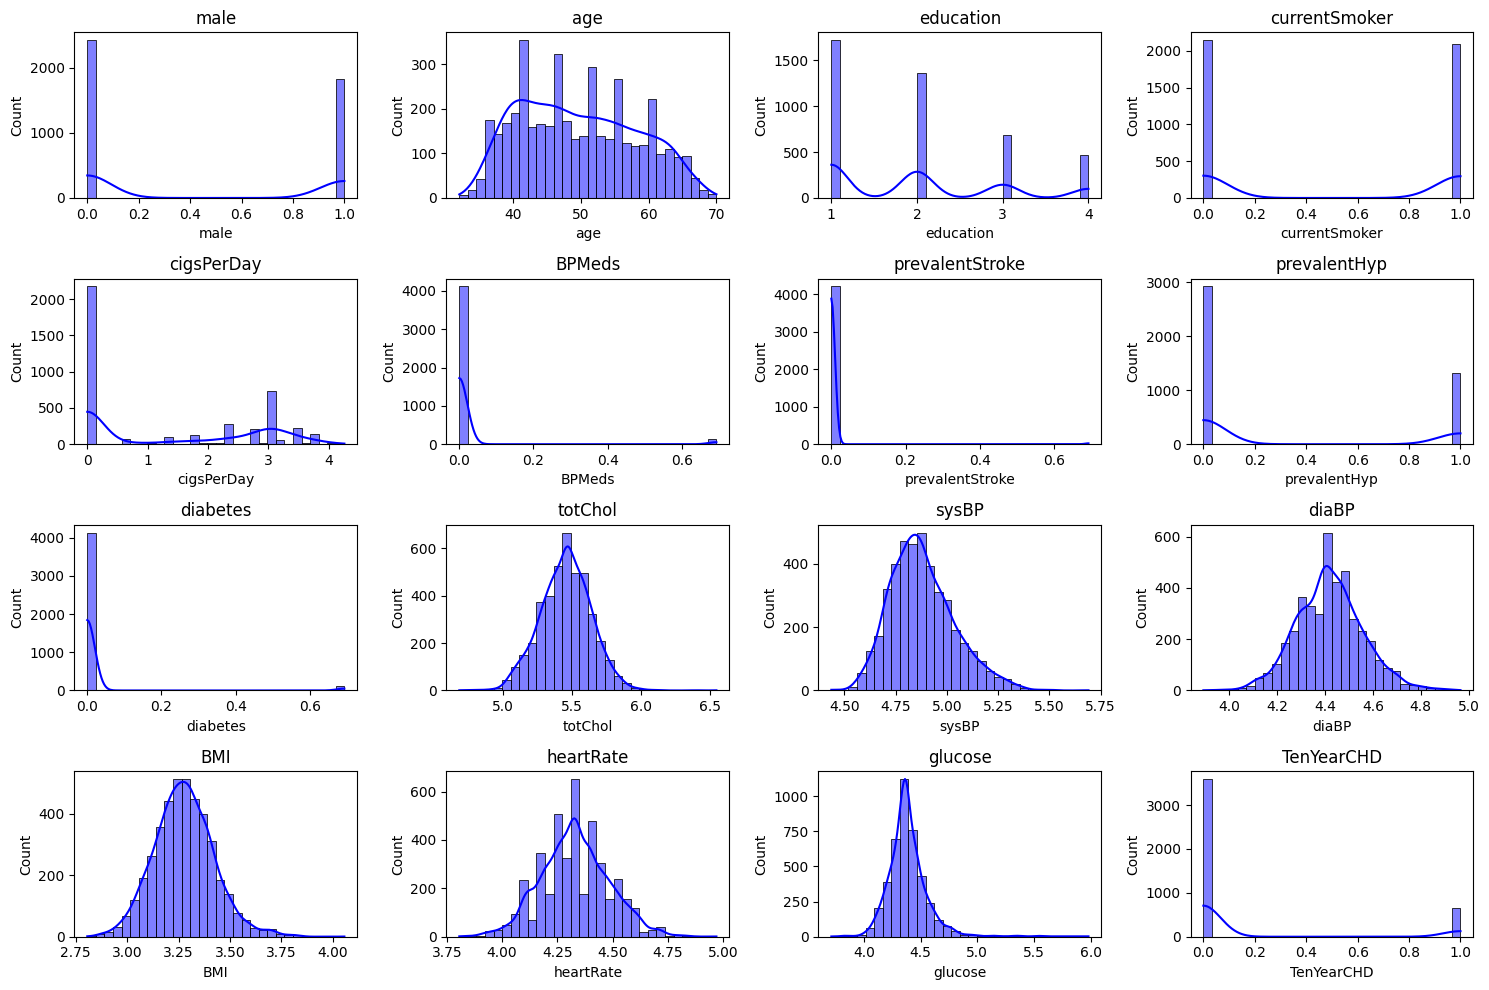

In [56]:

outlier_cols = ["cigsPerDay", "BPMeds", "prevalentStroke", "diabetes", "totChol", 
                "sysBP", "diaBP", "BMI", "heartRate", "glucose"]


df[outlier_cols] = np.log1p(df[outlier_cols]) 
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.select_dtypes(include=['number']).columns, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(df[column], kde=True, bins=30, color="blue", edgecolor="black")  
    plt.title(column)

plt.tight_layout() 
plt.show()

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_percentage_error

In [ ]:
X = df['TenYearCHD']
Y = df['TenYearCHD']